In [1]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneDataSet.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Cust_Id    1048574 non-null  int64 
 1   Rating     1048574 non-null  int64 
 2   Movie_Id   1048574 non-null  int64 
 3   Genre      1047488 non-null  object
 4   MovieName  1048574 non-null  object
dtypes: int64(3), object(2)
memory usage: 40.0+ MB


In [5]:
data.head()

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3,1,Action,Dinosaur Planet
1,822109,5,1,Action,Dinosaur Planet
2,885013,4,1,Action,Dinosaur Planet
3,30878,4,1,Action,Dinosaur Planet
4,823519,3,1,Action,Dinosaur Planet


In [6]:
data.isnull().sum()

Cust_Id         0
Rating          0
Movie_Id        0
Genre        1086
MovieName       0
dtype: int64

In [7]:
data.loc[data.Genre.isnull(),['MovieName']].value_counts()

MovieName                       
Midsomer Murders: Blood Will Out    1086
dtype: int64

In [8]:
data.loc[data["MovieName"] == "Midsomer Murders: Blood Will Out",["Genre"]] = "Mystery"

In [9]:
ratinggenre = data.groupby(["Rating","Genre"])['Genre'].agg("count")

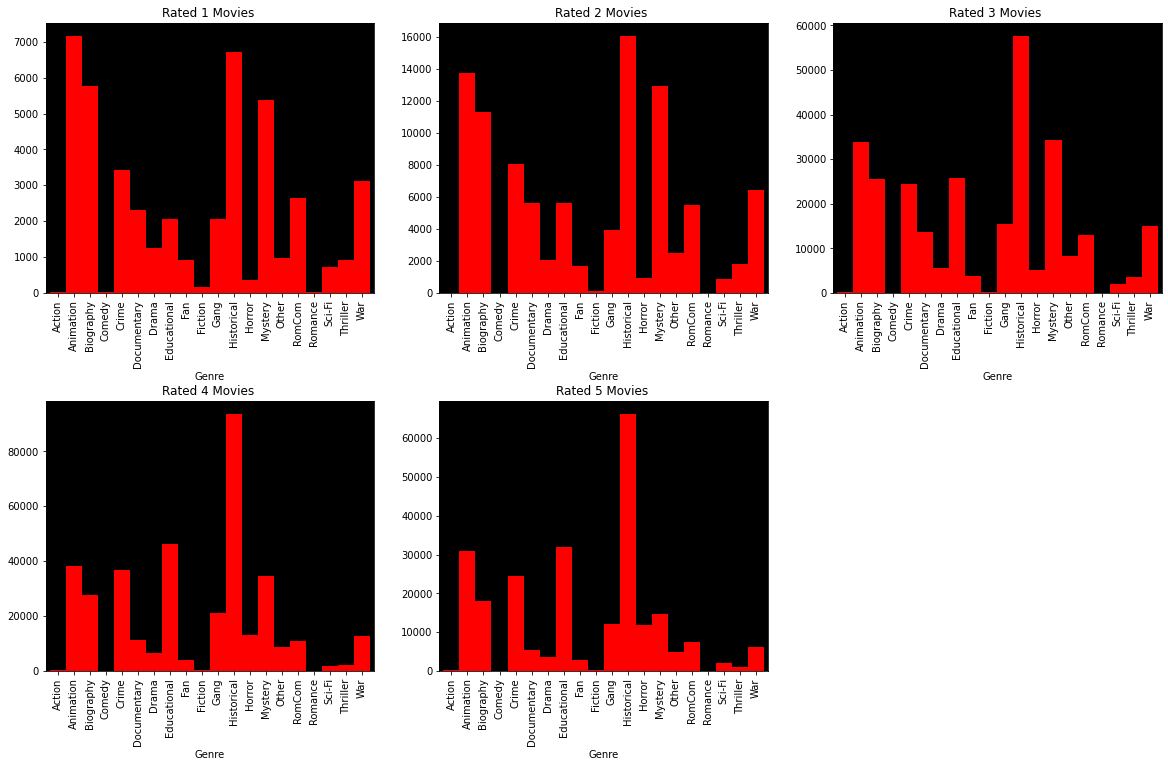

In [10]:
fig  = plt.subplots(2,3,figsize = (20,10))
ax = plt.axes()
for i in range(1,6):
    plt.subplot(2,3,i,facecolor = 'black')
    ratinggenre[i].plot(kind="bar",color='red',width = 1)
    plt.title("Rated "+str(i)+" Movies ")
    plt.subplots_adjust(bottom=0.1,
                    top=1,  
                    hspace=0.4)

plt.show()


In [11]:
data.nunique()

Cust_Id      287458
Rating            5
Movie_Id        241
Genre            20
MovieName       241
dtype: int64

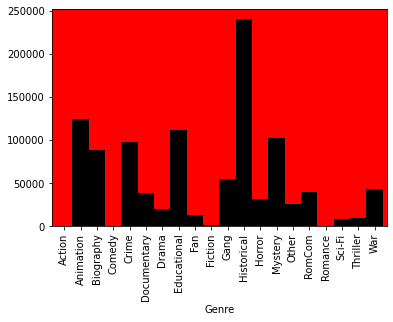

In [12]:
ax = plt.axes()
ax.set_facecolor("red")
data.groupby("Genre")["Rating"].agg("count").plot(kind='bar',color='black',width = 1)
plt.show()

In [13]:
genre_grouped_data = data.groupby("Genre")["Rating"].agg("count").sort_values(ascending=False)

#  list of most popular and liked genre

In [14]:
print("Top 5 most rated genres")
for genres in genre_grouped_data[0:5].index:
    print(genres)

Top 5 most rated genres
Historical
Animation
Educational
Mystery
Crime


# Top Genres according to ratings 


1.  Rating 1 is worst rating
2.  Rating 5 is best rating



In [143]:
for i in range(1,6):
    print("Top 5 rated " ,str(i) ,"genres")
    print(ratinggenre[i].sort_values(ascending = False)[:5].index.to_list())

Top 5 rated  1 genres
['Animation', 'Historical', 'Biography', 'Mystery', 'Crime']
Top 5 rated  2 genres
['Historical', 'Animation', 'Mystery', 'Biography', 'Crime']
Top 5 rated  3 genres
['Historical', 'Mystery', 'Animation', 'Educational', 'Biography']
Top 5 rated  4 genres
['Historical', 'Educational', 'Animation', 'Crime', 'Mystery']
Top 5 rated  5 genres
['Historical', 'Educational', 'Animation', 'Crime', 'Biography']


In [142]:
print("Top 5 least rated genres")
for genres in genre_grouped_data[-6:-1].index:
    print(genres)

Top 5 least rated genres
Thriller
Sci-Fi
Fiction
Action
Comedy


In [18]:
data.Rating.value_counts().sort_index()


1     46054
2     99398
3    287967
4    370551
5    244604
Name: Rating, dtype: int64

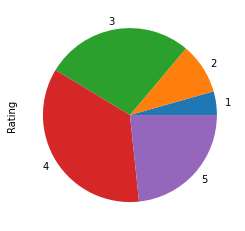

In [19]:
data.Rating.value_counts().sort_index().plot(kind = 'pie')

In [20]:
data.groupby("MovieName")["Rating"].agg('count').sort_values(ascending = False)[:6]

MovieName
Something's Gotta Give    118413
X2: X-Men United           98720
Reservoir Dogs             90450
Taking Lives               81260
Lilo and Stitch            39752
The Game                   38362
Name: Rating, dtype: int64

In [21]:
data.Rating.value_counts().quantile(0.7)

279294.39999999997

In [132]:
data.loc[data.Movie_Id == 1,'MovieName'].iloc[0],data.loc[data.Movie_Id == 1,'Genre'].iloc[0]

('Dinosaur Planet', 'Action')

In [25]:
MovieGenreDF = pd.concat([pd.DataFrame([[i,
                         data.loc[data.Movie_Id == i,'MovieName'].iloc[0],
                         data.loc[data.Movie_Id == i,'Genre'].iloc[0]]], columns = ['MovieID','MovieName','Genre']) 
                        for i in data.Movie_Id.unique()],
          ignore_index=True)

In [26]:
MovieGenreDF

,MovieID,MovieName,Genre
0,1,Dinosaur Planet,Action
1,2,Isle of Man TT 2004 Review,Comedy
2,3,Character,Horror
3,4,Paula Abdul's Get Up & Dance,Romance
4,5,The Rise and Fall of ECW,Thriller
...,...,...,...
236,237,Broken Blossoms,Animation
237,238,Led Zeppelin: The Song Remains the Same,Other
238,239,Winnie the Pooh: Springtime with Roo,Mystery
239,240,Woman of the Year,Drama


In [138]:
MovieGenreDF.groupby('Genre')['MovieID'].agg('count')

Genre
Action          1
Animation      23
Biography      16
Comedy          1
Crime          15
Documentary    16
Drama          16
Educational    16
Fan            14
Fiction         1
Gang           16
Historical     16
Horror          2
Mystery        17
Other          16
RomCom         15
Romance         1
Sci-Fi         15
Thriller        8
War            16
Name: MovieID, dtype: int64

In [27]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633967 sha256=6dc2257ff2a97cf5defd72cbb4808d5dbaa03d7907f5af250786896b8c8b9da3
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [28]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [29]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
svd_data = Dataset.load_from_df(data[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, svd_data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0525  1.0536  1.0475  1.0512  0.0027  
MAE (testset)     0.8370  0.8373  0.8368  0.8370  0.0002  
Fit time          8.42    4.86    4.94    6.08    1.66    
Test time         0.40    0.28    0.33    0.34    0.05    


{'test_rmse': array([1.05253679, 1.05361314, 1.04746075]),
 'test_mae': array([0.83701146, 0.83728104, 0.83681291]),
 'fit_time': (8.424556732177734, 4.864731550216675, 4.942289352416992),
 'test_time': (0.3988077640533447, 0.282764196395874, 0.33472299575805664)}

In [30]:
data.loc[data.Rating == 5,'Cust_Id'].value_counts()

1664010    99
794999     65
2118461    62
447759     44
2238060    37
           ..
2367229     1
1103874     1
2440206     1
16115       1
1769515     1
Name: Cust_Id, Length: 140170, dtype: int64

# Prediction for USER 2238060

In [69]:
Pred = MovieGenreDF.copy()

In [70]:
Pred

,MovieID,MovieName,Genre
0,1,Dinosaur Planet,Action
1,2,Isle of Man TT 2004 Review,Comedy
2,3,Character,Horror
3,4,Paula Abdul's Get Up & Dance,Romance
4,5,The Rise and Fall of ECW,Thriller
...,...,...,...
236,237,Broken Blossoms,Animation
237,238,Led Zeppelin: The Song Remains the Same,Other
238,239,Winnie the Pooh: Springtime with Roo,Mystery
239,240,Woman of the Year,Drama


In [68]:
svd_data = Dataset.load_from_df(data[['Cust_Id', 'Movie_Id', 'Rating']], reader)
trainset = svd_data.build_full_trainset()
svd.fit(trainset)

In [127]:
Pred['Estimate_Score'] = Pred['MovieID'].apply(lambda x: svd.predict(2238060, x).est)

In [128]:
Result = pd.DataFrame(columns=['MovieID','MovieName','Genre','Estimate_Score'])
for genre in Pred.Genre.unique():
  TEMPDF = Pred.loc[(Pred.Genre == genre) & (Pred.Estimate_Score == Pred.loc[Pred.Genre == genre].Estimate_Score.max())]
  Result = Result.append(TEMPDF,ignore_index = True)

In [129]:
Result

,MovieID,MovieName,Genre,Estimate_Score
0,1,Dinosaur Planet,Action,4.302694
1,2,Isle of Man TT 2004 Review,Comedy,3.709933
2,241,North by NorthWest,Horror,4.503637
3,4,Paula Abdul's Get Up & Dance,Romance,3.191127
4,13,Lord of the Rings: The Return of the King: Ext...,Thriller,4.859765
5,6,Sick,Fiction,3.684892
6,84,The Powerpuff Girls Movie,Animation,4.586138
7,152,A Little Princess,Gang,4.604449
8,85,Elfen Lied,Other,4.900867
9,113,Bruce Lee: A Warrior's Journey,Mystery,4.751981
